In [29]:
%pip install researchpy
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [88]:
# importing modules

import os
import pip
import numpy as np
import pandas as pd
import mne
from scipy import stats as st
import statistics as stats
from itertools import combinations
import researchpy as rp
import matplotlib.pyplot as plt

from statsmodels.stats.multitest import multipletests as multi

In [31]:
epochs = mne.read_epochs('./Data/Epochs/thatcher_epochs.fif')



Reading /Users/elisius/Library/CloudStorage/OneDrive-AarhusUniversitet/4. Semester/EXAM_Neuro/EEG_Thatcher_Effect/Data/Epochs/thatcher_epochs.fif ...
    Found the data of interest:
        t =    -100.00 ...     696.00 ms
        0 CTF compensation matrices available


/var/folders/kf/wwp_17qs7v980_90pbjz9b240000gn/T/ipykernel_60719/3710821191.py:1: RuntimeWarning: This filename (./Data/Epochs/thatcher_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = mne.read_epochs('./Data/Epochs/thatcher_epochs.fif')


Not setting metadata
358 matching events found
No baseline correction applied
0 projection items activated


## creating the evoked variables

In [116]:
# NOT evoked variabled 
all_changed = epochs['Changed']
all_unchanged = epochs['Unchanged']

# Evoked variables
## Changed vs unchaged
all_changed_evoked = epochs['Changed'].average()
all_unchanged_evoked = epochs['Unchanged'].average()

# INTERACTIONS
# Changed vs Unchanged X Inversion effect
## creating for changed vs unchanged for each rotation
changed_0 = epochs['Changed/0'].average()
changed_90 = epochs['Changed/90'].average()
changed_180 = epochs['Changed/180'].average()

unchanged_0 = epochs['Unchanged/0'].average()
unchanged_90 = epochs['Unchanged/90'].average()
unchanged_180 = epochs['Unchanged/180'].average()

conditions_nofamiliarity = [changed_0, changed_90, changed_180, unchanged_0, unchanged_90, unchanged_180]


# creating the differences between upright and inverted by suptracting
## the weights=[1, -1] is to subtract the inverted from the upright
diff_0 = mne.combine_evoked([unchanged_0, changed_0], weights=[1, -1])
diff_90 = mne.combine_evoked([unchanged_90, changed_90], weights=[1, -1])
diff_180 = mne.combine_evoked([unchanged_180, changed_180], weights=[1, -1])

plot_conditions_nofamiliarity = [unchanged_0, unchanged_90, unchanged_180, changed_0, changed_90, changed_180, diff_0, diff_90, diff_180]

# Familiar vs Unfamiliar X Changed vs Unchanged X Inversion effect
## creating for famiar vs unfamiliar interacting with inverse effect

## Familiar
changed_0_familiar = epochs['Changed/0/Familliar'].average()
changed_90_familiar = epochs['Changed/90/Familliar'].average()
changed_180_familiar = epochs['Changed/180/Familliar'].average()

unchanged_0_familiar = epochs['Unchanged/0/Familliar'].average()
unchanged_90_familiar = epochs['Unchanged/90/Familliar'].average()
unchanged_180_familiar = epochs['Unchanged/180/Familliar'].average()

# creating the differences between upright and inverted by subtracting
## the weights=[1, -1] is to subtract the inverted from the upright
diff_0_familiar = mne.combine_evoked([unchanged_0_familiar, changed_0_familiar], weights=[1, -1])
diff_90_familiar = mne.combine_evoked([unchanged_90_familiar, changed_90_familiar], weights=[1, -1])
diff_180_familiar = mne.combine_evoked([unchanged_180_familiar, changed_180_familiar], weights=[1, -1])

plot_conditions_familiar = [unchanged_0_familiar, unchanged_90_familiar, unchanged_180_familiar, changed_0_familiar, changed_90_familiar, changed_180_familiar, diff_0_familiar, diff_90_familiar, diff_180_familiar]

## Unfamiliar
changed_0_unfamiliar = epochs['Changed/0/Unfamilliar'].average()
changed_90_unfamiliar = epochs['Changed/90/Unfamilliar'].average()
changed_180_unfamiliar = epochs['Changed/180/Unfamilliar'].average()

unchanged_0_unfamiliar = epochs['Unchanged/0/Unfamilliar'].average()
unchanged_90_unfamiliar = epochs['Unchanged/90/Unfamilliar'].average()
unchanged_180_unfamiliar = epochs['Unchanged/180/Unfamilliar'].average()

# creating the differences between upright and inverted by subtracting
## the weights=[1, -1] is to subtract the inverted from the upright
diff_0_unfamiliar = mne.combine_evoked([unchanged_0_unfamiliar, changed_0_unfamiliar], weights=[1, -1])
diff_90_unfamiliar = mne.combine_evoked([unchanged_90_unfamiliar, changed_90_unfamiliar], weights=[1, -1])
diff_180_unfamiliar = mne.combine_evoked([unchanged_180_unfamiliar, changed_180_unfamiliar], weights=[1, -1])

plot_conditions_unfamiliar = [unchanged_0_unfamiliar, unchanged_90_unfamiliar, unchanged_180_unfamiliar, changed_0_unfamiliar, changed_90_unfamiliar, changed_180_unfamiliar, diff_0_unfamiliar, diff_90_unfamiliar, diff_180_unfamiliar]

all_conditions = [changed_0_familiar, changed_90_familiar, changed_180_familiar, unchanged_0_familiar, unchanged_90_familiar, unchanged_180_familiar, changed_0_unfamiliar, changed_90_unfamiliar, changed_180_unfamiliar, unchanged_0_unfamiliar, unchanged_90_unfamiliar, unchanged_180_unfamiliar]

combining channels using "gfp"
combining channels using "gfp"


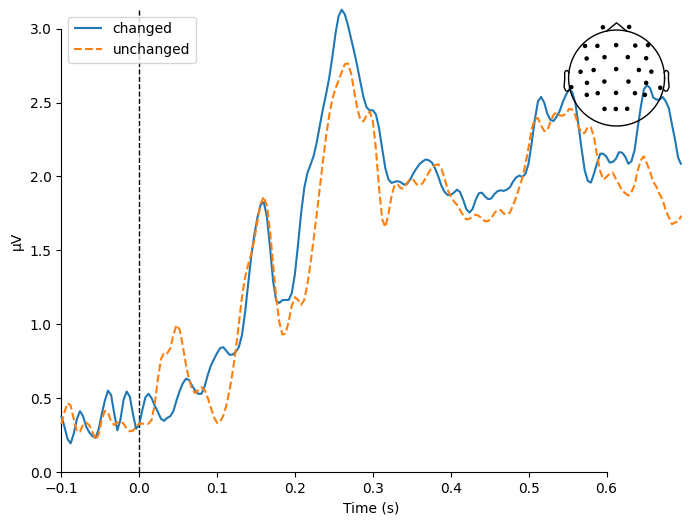

[<Figure size 800x600 with 2 Axes>]

In [38]:
# ALL CHANGED VS UNCHANGED
mne.viz.plot_compare_evokeds(dict(changed=all_changed_evoked, unchanged=all_unchanged_evoked),
                             linestyles=dict(changed ='solid', unchanged ='dashed'),
                             legend='upper left', show_sensors='upper right')

More than 6 channels, truncating title ...
combining channels using "gfp"
combining channels using "gfp"


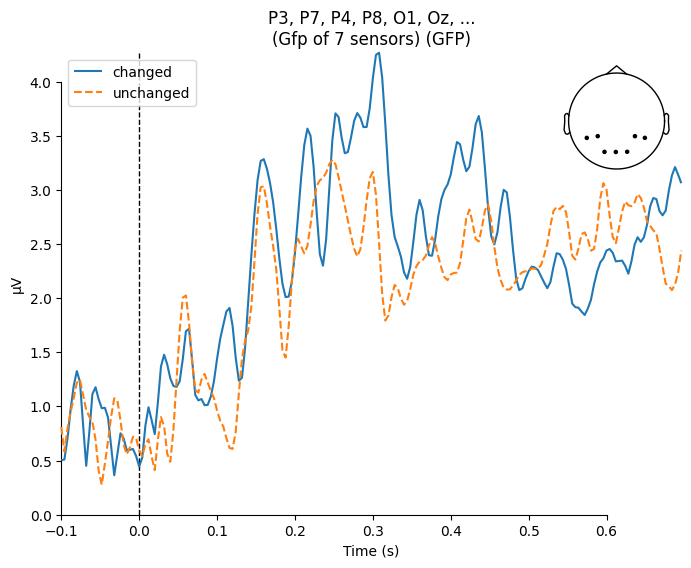

[<Figure size 800x600 with 2 Axes>]

In [64]:
# UPRIGHT (0 Degree rotation / No inversion) X changed vs unchanged
mne.viz.plot_compare_evokeds(dict(changed=changed_0, unchanged=unchanged_0),
                             linestyles=dict(changed ='solid', unchanged ='dashed'),
                             legend='upper left', show_sensors='upper right',
                             picks=['P3', 'P7', "P4", "P8", "O1", "Oz", "O2"])


combining channels using "mean"
combining channels using "mean"


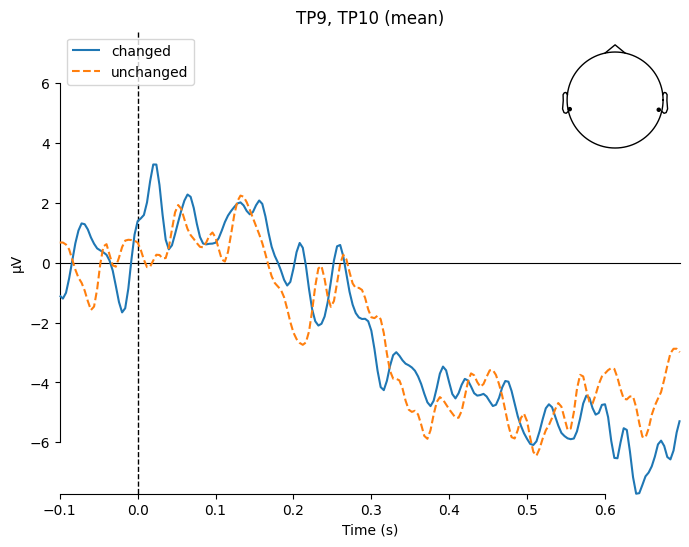

[<Figure size 800x600 with 2 Axes>]

In [85]:
mne.viz.plot_compare_evokeds(dict(changed=changed_0, unchanged=unchanged_0),
                             linestyles=dict(changed ='solid', unchanged ='dashed'),
                             legend='upper left', show_sensors='upper right',
                             combine="mean",
                             picks=["TP9","TP10"])


# N170 topographical maps without familiarity effect

In [121]:
plot_conditions_nofamiliarity

[<Evoked | '0.50 × Unchanged/Familliar/0 + 0.50 × Unchanged/Unfamilliar/0' (average, N=30), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>,
 <Evoked | '0.50 × Unchanged/Familliar/90 + 0.50 × Unchanged/Unfamilliar/90' (average, N=30), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>,
 <Evoked | '0.50 × Unchanged/Familliar/180 + 0.50 × Unchanged/Unfamilliar/180' (average, N=30), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>,
 <Evoked | '0.50 × Changed/Familliar/0 + 0.50 × Changed/Unfamilliar/0' (average, N=30), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>,
 <Evoked | '0.50 × Changed/Familliar/90 + 0.50 × Changed/Unfamilliar/90' (average, N=30), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>,
 <Evoked | '0.50 × Changed/Familliar/180 + 0.50 × Changed/Unfamilliar/180' (average, N=30), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>,
 <Evoked | '(0.50 × Unchanged/Familliar/0 + 0.50 × Unchanged/Unfamilliar/0) - (0.50 × Changed/Familliar/0 

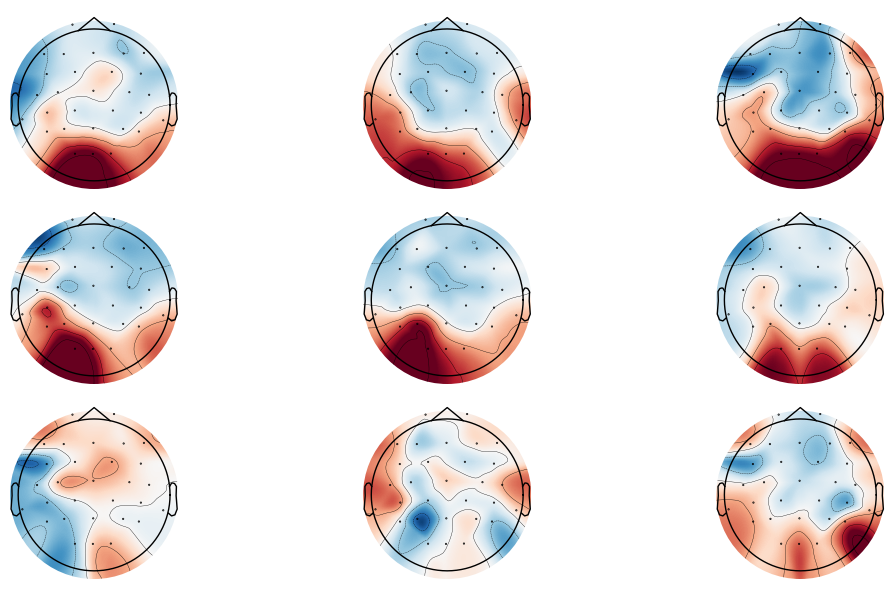

In [145]:
# plot a 3x3 grid of topographies, 
# col 1 = upright, col 2 = 90 degree rotation, col 3 = 180 degree rotation
# row 1 = unchanged, row 2 = changed, row 3 = difference between changed and unchanged

time = 0.17

n_conditions = len(plot_conditions_nofamiliarity)
n_cols = 3  # Number of columns in the subplot grid (for each rotation)
n_rows = (n_conditions + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))

vlim = [-4, 4]  # Set the topomap limits for all plots

for i, condition in enumerate(plot_conditions_nofamiliarity):
    row_idx = i // n_cols  # Calculate the row index
    col_idx = i % n_cols  # Calculate the column index

    ax = axes[row_idx, col_idx] if n_cols > 1 else axes[row_idx]  # Adjust indexing for row-wise order
    condition.plot_topomap(time, ch_type='eeg', average=0.024, time_unit='s',
                           axes=ax, show=False, vlim=vlim, colorbar=False)
    ax.set_title("")  # Remove the title


fig.tight_layout()
plt.show()


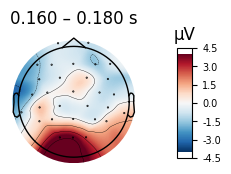

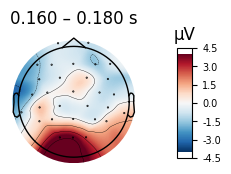

In [146]:

time = 0.17


vlim = [-4, 4]  # Set the topomap limits for all plots

unchanged_0.plot_topomap(time, ch_type='eeg', average=0.024, time_unit='s',
                        show=True, vlim=vlim)




# N170 topographical maps with familiarity


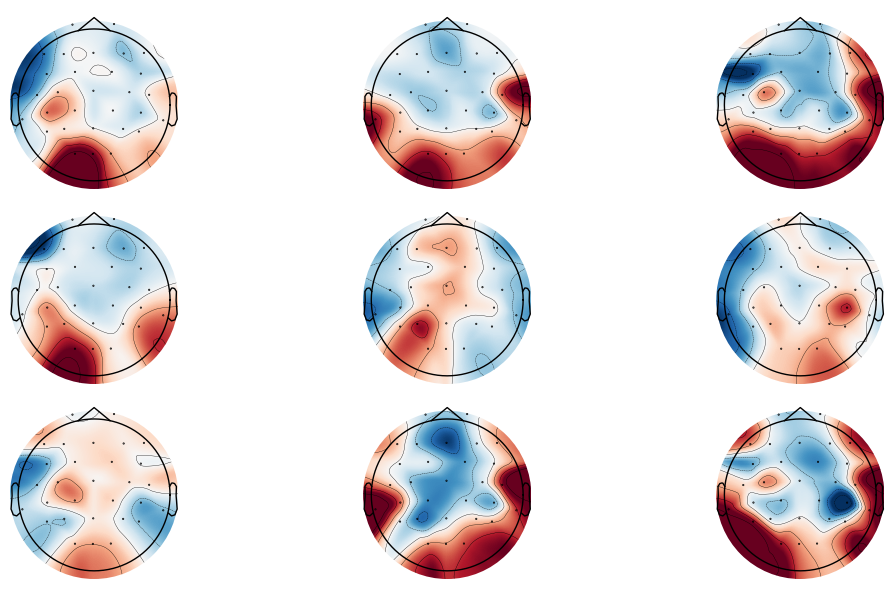

In [147]:
# plot a 3x3 grid of topographies, 
# col 1 = upright, col 2 = 90 degree rotation, col 3 = 180 degree rotation
# row 1 = unchanged, row 2 = changed, row 3 = difference between changed and unchanged

time = 0.17

n_conditions = len(plot_conditions_familiar)
n_cols = 3  # Number of columns in the subplot grid (for each rotation)
n_rows = (n_conditions + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))

vlim = [-4, 4]  # Set the topomap limits for all plots  

for i, condition in enumerate(plot_conditions_familiar):
    row_idx = i // n_cols  # Calculate the row index
    col_idx = i % n_cols  # Calculate the column index

    ax = axes[row_idx, col_idx] if n_cols > 1 else axes[row_idx]  # Adjust indexing for row-wise order
    condition.plot_topomap(time, ch_type='eeg', average=0.024, time_unit='s',
                           axes=ax, show=False, vlim=vlim, colorbar=False)
    ax.set_title("")  # Remove the title

fig.tight_layout()
plt.show()


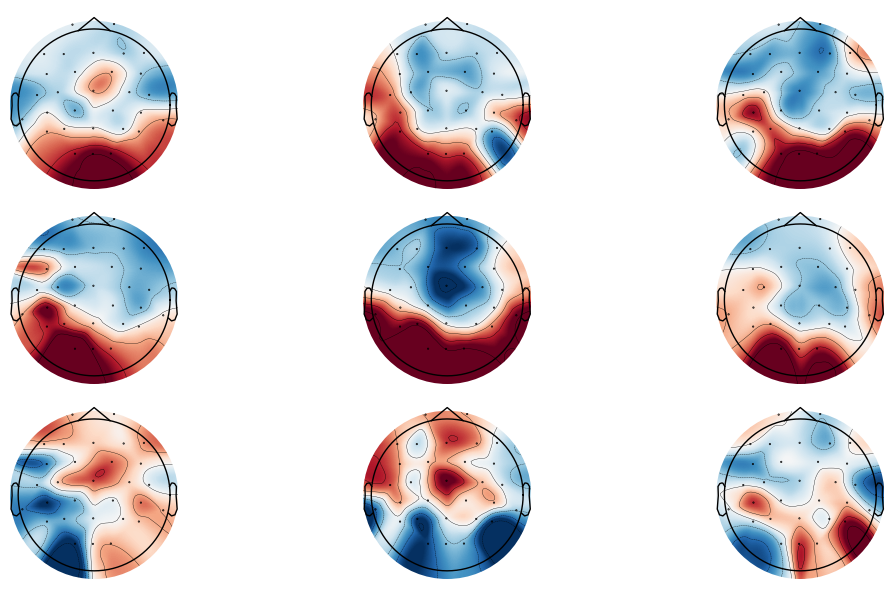

In [148]:
# plot a 3x3 grid of topographies, 
# col 1 = upright, col 2 = 90 degree rotation, col 3 = 180 degree rotation
# row 1 = unchanged, row 2 = changed, row 3 = difference between changed and unchanged

time = 0.17

n_conditions = len(plot_conditions_unfamiliar)
n_cols = 3  # Number of columns in the subplot grid (for each rotation)
n_rows = (n_conditions + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))

vlim = [-4, 4]  # Set the topomap limits for all plots  

for i, condition in enumerate(plot_conditions_unfamiliar):
    row_idx = i // n_cols  # Calculate the row index
    col_idx = i % n_cols  # Calculate the column index

    ax = axes[row_idx, col_idx] if n_cols > 1 else axes[row_idx]  # Adjust indexing for row-wise order
    condition.plot_topomap(time, ch_type='eeg', average=0.024, time_unit='s',
                           axes=ax, show=False, vlim=vlim, colorbar=False)
    ax.set_title("")  # Remove the title

fig.tight_layout()
plt.show()


This is the plot for evoked epochs of condition: <Evoked | 'Changed/Familliar/0' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>
No projector specified for this dataset. Please consider the method self.add_proj.


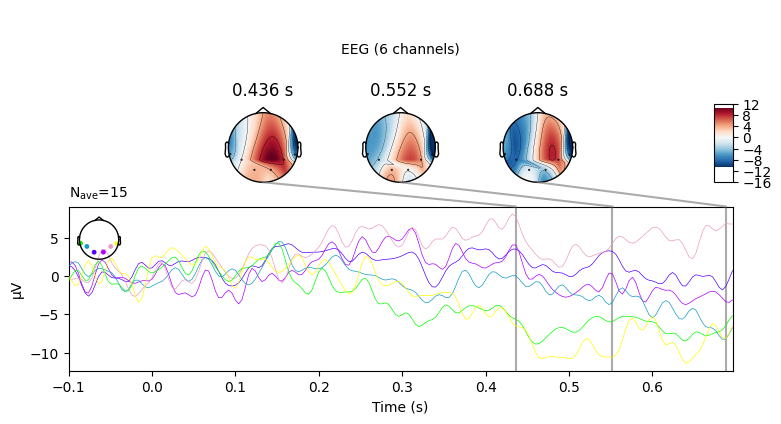

This is the plot for evoked epochs of condition: <Evoked | 'Changed/Familliar/90' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>
No projector specified for this dataset. Please consider the method self.add_proj.


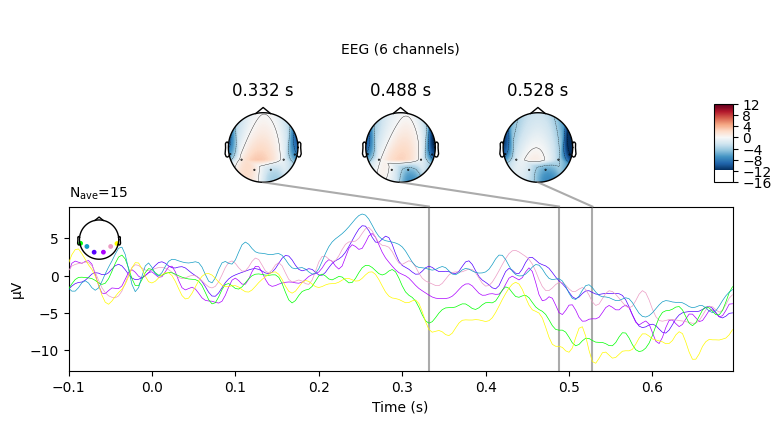

This is the plot for evoked epochs of condition: <Evoked | 'Changed/Familliar/180' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>
No projector specified for this dataset. Please consider the method self.add_proj.


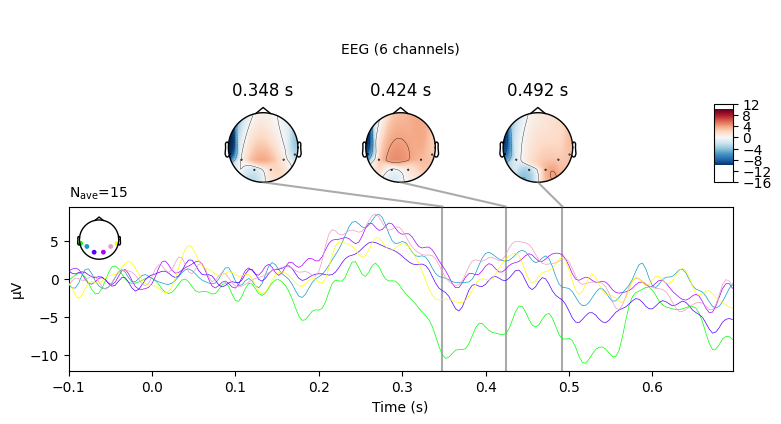

This is the plot for evoked epochs of condition: <Evoked | 'Unchanged/Familliar/0' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>
No projector specified for this dataset. Please consider the method self.add_proj.


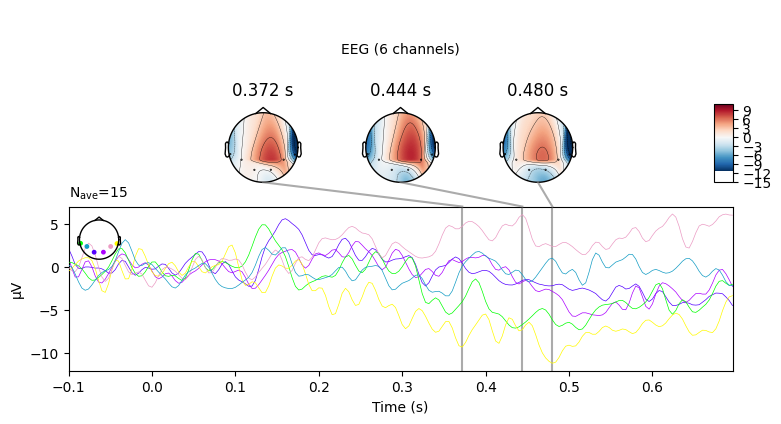

This is the plot for evoked epochs of condition: <Evoked | 'Unchanged/Familliar/90' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>
No projector specified for this dataset. Please consider the method self.add_proj.


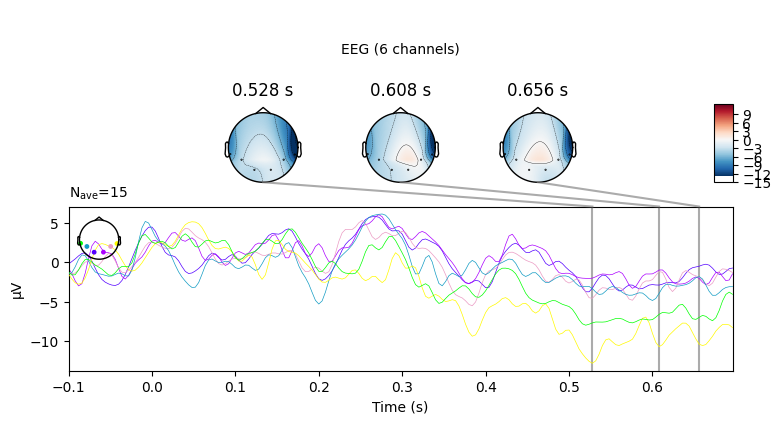

This is the plot for evoked epochs of condition: <Evoked | 'Unchanged/Familliar/180' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>
No projector specified for this dataset. Please consider the method self.add_proj.


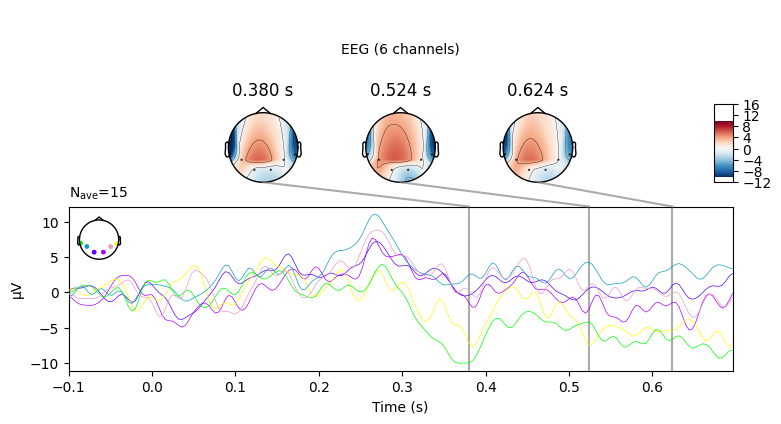

This is the plot for evoked epochs of condition: <Evoked | 'Changed/Unfamilliar/0' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>
No projector specified for this dataset. Please consider the method self.add_proj.


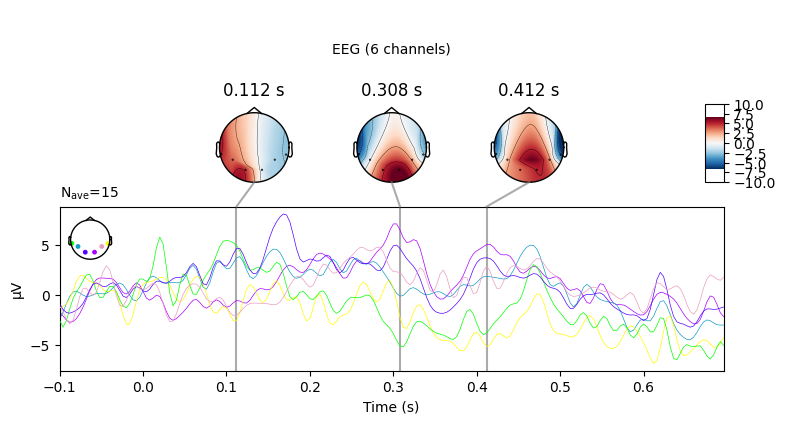

This is the plot for evoked epochs of condition: <Evoked | 'Changed/Unfamilliar/90' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>
No projector specified for this dataset. Please consider the method self.add_proj.


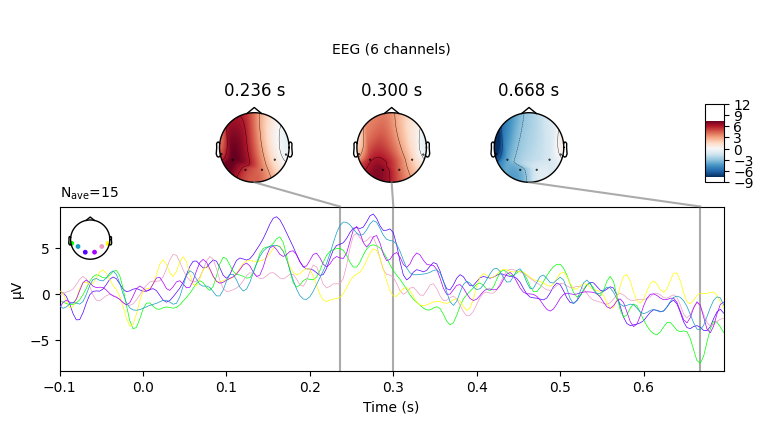

This is the plot for evoked epochs of condition: <Evoked | 'Changed/Unfamilliar/180' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>
No projector specified for this dataset. Please consider the method self.add_proj.


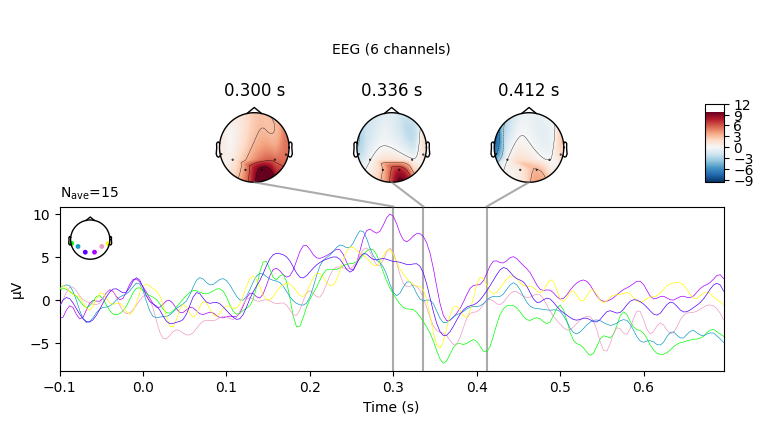

This is the plot for evoked epochs of condition: <Evoked | 'Unchanged/Unfamilliar/0' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>
No projector specified for this dataset. Please consider the method self.add_proj.


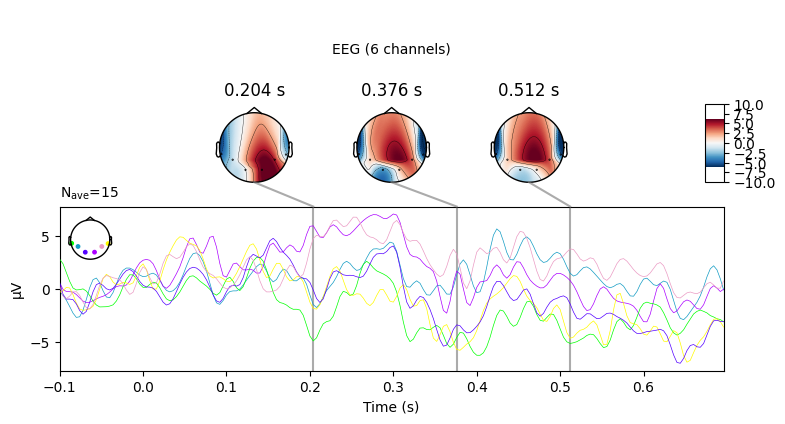

This is the plot for evoked epochs of condition: <Evoked | 'Unchanged/Unfamilliar/90' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>
No projector specified for this dataset. Please consider the method self.add_proj.


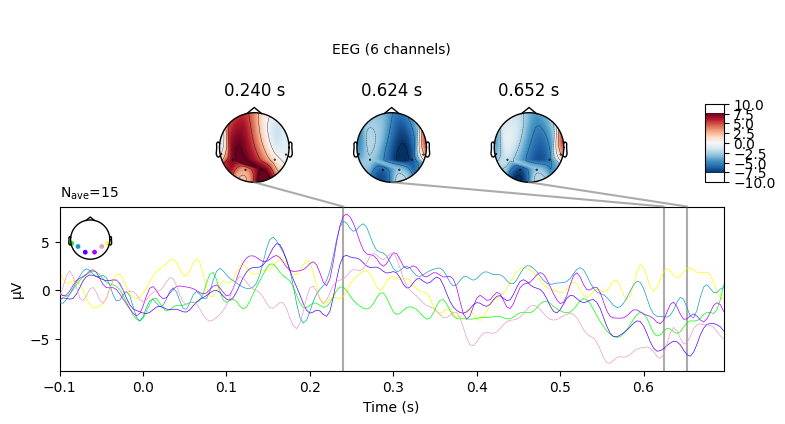

This is the plot for evoked epochs of condition: <Evoked | 'Unchanged/Unfamilliar/180' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>
No projector specified for this dataset. Please consider the method self.add_proj.


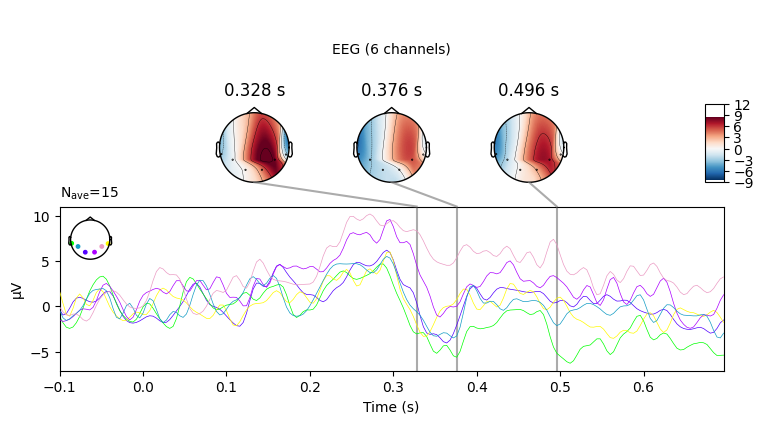

In [74]:
for i in all_conditions:
    print("This is the plot for evoked epochs of condition:", i)
    i.plot_joint(picks=['TP9', 'TP10','P7', "P8", "O1", "O2"])


this is the plot for condition: <Evoked | 'Changed/Familliar/0' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>


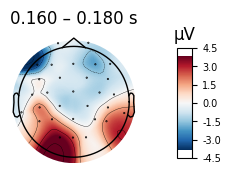

this is the plot for condition: <Evoked | 'Changed/Familliar/90' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>


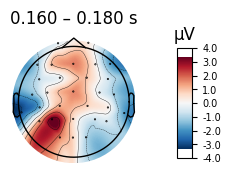

this is the plot for condition: <Evoked | 'Changed/Familliar/180' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>


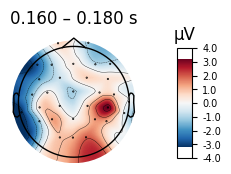

this is the plot for condition: <Evoked | 'Unchanged/Familliar/0' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>


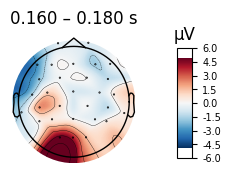

this is the plot for condition: <Evoked | 'Unchanged/Familliar/90' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>


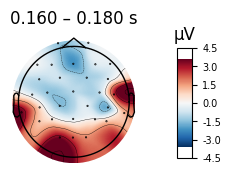

this is the plot for condition: <Evoked | 'Unchanged/Familliar/180' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>


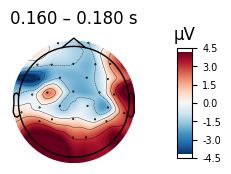

this is the plot for condition: <Evoked | 'Changed/Unfamilliar/0' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>


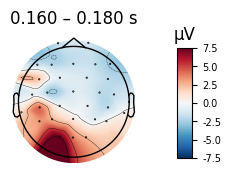

this is the plot for condition: <Evoked | 'Changed/Unfamilliar/90' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>


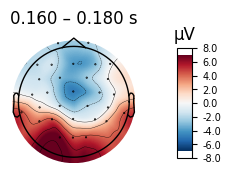

this is the plot for condition: <Evoked | 'Changed/Unfamilliar/180' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>


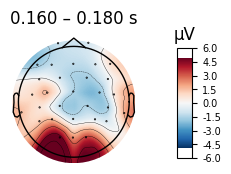

this is the plot for condition: <Evoked | 'Unchanged/Unfamilliar/0' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>


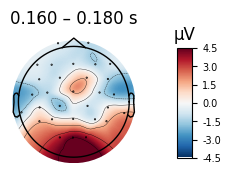

this is the plot for condition: <Evoked | 'Unchanged/Unfamilliar/90' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>


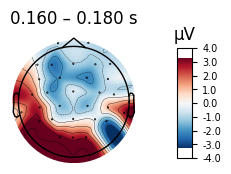

this is the plot for condition: <Evoked | 'Unchanged/Unfamilliar/180' (average, N=15), -0.1 – 0.696 sec, baseline -0.1 – 0 sec, 30 ch, ~96 kB>


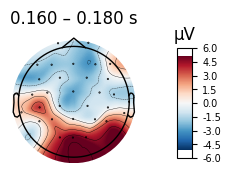

In [81]:
times = 0.17

for i in conditions:
    print("this is the plot for condition:", i)
    i.plot_topomap(times, ch_type='eeg', average=0.024, time_unit='s')


Difference between normal and thatcherized for upright familiar faces


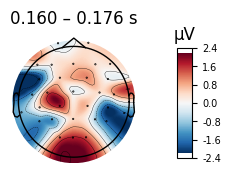

Difference between normal and thatcherized for inversed familiar faces


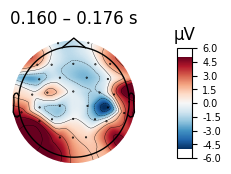

Difference between normal and thatcherized for upright unfamiliar faces


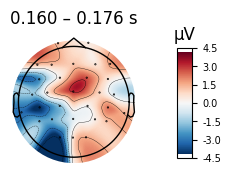

Difference between normal and thatcherized for inversed unfamiliar faces


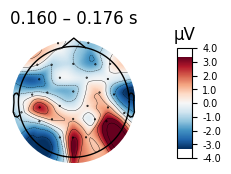

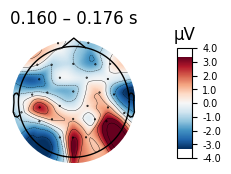

In [79]:
print("Difference between normal and thatcherized for upright familiar faces")
diff_0_familiar.plot_topomap(times, ch_type='eeg', average=0.02, time_unit='s')

print("Difference between normal and thatcherized for inversed familiar faces")
diff_180_familiar.plot_topomap(times, ch_type='eeg', average=0.02, time_unit='s')


print("Difference between normal and thatcherized for upright unfamiliar faces")
diff_0_unfamiliar.plot_topomap(times, ch_type='eeg', average=0.02, time_unit='s')

print("Difference between normal and thatcherized for inversed unfamiliar faces")
diff_180_unfamiliar.plot_topomap(times, ch_type='eeg', average=0.02, time_unit='s')



